In [1]:
from keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# Test dataset

In [2]:
x=pd.read_csv('ftest.csv')
x.head(3)
x.shape

(200, 98)

# scaling the data

In [3]:
sc = StandardScaler()
X_test = sc.fit_transform(x)

# loading the trained_model

In [4]:
model=load_model('fmodel72.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               59400     
_________________________________________________________________
dense_1 (Dense)              (None, 400)               240400    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 80)                4080      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 6

In [13]:
y_pred=model.predict(X_test[0:10])
y_pred.shape

(10, 8)

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:10]

[1, 1, 5, 5, 4, 1, 1, 2, 1, 4]

# making the predictions

In [15]:
prediction=pd.DataFrame(y_predicted_labels,columns=["Injury_severity(prediction)"])
prediction=prediction.replace({0:'Died_prior_to_accident',1:'Fatal_Injury',2:'Incapaciting_Injury',3:'Injured_Severity_Unknown',4:'No_Injury',5:'Nonincapaciting_Evident_Injury',6:'Possible_Injury',7:'Unknown'})

In [16]:
prediction

,Injury_severity(prediction)
0,Fatal_Injury
1,Fatal_Injury
2,Nonincapaciting_Evident_Injury
3,Nonincapaciting_Evident_Injury
4,No_Injury
5,Fatal_Injury
6,Fatal_Injury
7,Incapaciting_Injury
8,Fatal_Injury
9,No_Injury


In [17]:
test=pd.read_csv('table1.csv',usecols=['INJURY_SEVERITY'])
test=test[100:110] #since saved test dataset records starts from 100 index
test

,INJURY_SEVERITY
100,Fatal_Injury
101,Fatal_Injury
102,Incapaciting_Injury
103,Incapaciting_Injury
104,No_Injury
105,Nonincapaciting_Evident_Injury
106,Fatal_Injury
107,Incapaciting_Injury
108,Fatal_Injury
109,Fatal_Injury


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


# Confusion metrics

In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

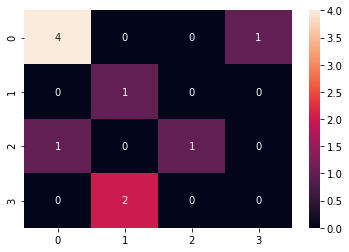

In [20]:
cm=confusion_matrix(prediction,test)
sns.heatmap(cm,annot=True)

In [21]:
print(metrics.confusion_matrix(test,prediction, labels=['Died_prior_to_accident','Fatal_Injury','Incapaciting_Injury','Injured_Severity_Unknown','No_Injury','Nonincapaciting_Evident_Injury','Possible_Injury','Unknown']))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(test,prediction, labels=['Died_prior_to_accident','Fatal_Injury','Incapaciting_Injury','Injured_Severity_Unknown','No_Injury','Nonincapaciting_Evident_Injury','Possible_Injury','Unknown']))

[[0 0 0 0 0 0 0 0]
 [0 4 0 0 1 0 0 0]
 [0 0 1 0 0 2 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
                                precision    recall  f1-score   support

        Died_prior_to_accident       0.00      0.00      0.00         0
                  Fatal_Injury       0.80      0.80      0.80         5
           Incapaciting_Injury       1.00      0.33      0.50         3
      Injured_Severity_Unknown       0.00      0.00      0.00         0
                     No_Injury       0.50      1.00      0.67         1
Nonincapaciting_Evident_Injury       0.00      0.00      0.00         1
               Possible_Injury       0.00      0.00      0.00         0
                       Unknown       0.00      0.00      0.00         0

                     micro avg       0.60      0.60      0.60        10
                     macro avg       0.29      0.27      0.25        10
                  weighted avg       0.75      0.60  

C:\Users\surya\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\envs\min